In [2]:
%load_ext autoreload
%autoreload 2
# You can load your python module as this:
import dataproject.example

In [4]:
import os
os.getcwd()

'C:\\Users\\Manon\\Desktop\\projects-2019-al-3\\dataproject'

In [2]:
dataproject.example.hello_world() 
#1 Summary
# In our data analysis project we work with two data sets on average wages and avereage CO2 emissions in the OECD countries,
# which we retrieved from the OECD data base. After we clean the data and make relevant adjustments, we merge the data sets.
# In addiotion to that, we have created some function to facillitate targeted data retrieval.
# We then plot the average wages and CO2 emissions by country, as well as their percentage change over time.

'hello world'

In [ ]:
#3 Import data
#Here we import the relevant data sets. We import the data on average wages as a csv file. 
#The data on average CO2 emissions is imported via an API from the OECD database.

df = pdr.DataReader("AIR_GHG","oecd")

data_wages= pd.read_csv("oecdwages.csv")

In [ ]:
#4 Cleaning and restructuring of data

#The data is in "multi-index form", these codes turns it into a more common non-hieracical structure
df.reset_index()
dir(df.index)
df.columns = [' '.join(col).strip() for col in df.columns.values]

# Excel list of countries, as they are not "availeble to grab"
countries = ["Australia","Austria","Belgium","Canada","Chile","Czech Republic","Denmark","Estonia","Finland","France","Germany","Greece","Hungary","Iceland",	
    "Ireland","Israel","Italy","Japan","Korea","Latvia","Lithuania","Luxembourg","Mexico","Netherlands","New Zealand","Norway","Poland","Portugal","Slovak Republic",
    "Slovenia","Spain","Sweden","Switzerland","United Kingdom","United States"]	
countrycode = ["AUS", "AUT", "BEL", "CAN", "CHL", "CZE", "DNK", "EST", "FIN", "FRA", "DEU","GRC", "HUN", "ISL", "IRL", "ISR", "ITA", "JPN", 
    "KOR", "LVA", "LTU", "LUX", "MEX", "NLD", "NZL", "NOR", "POL", "PRT", "SVK", "SVN", "SWE", "ESP", "CHE", "GBR", "USA"]
ccc = dict(zip(countries,countrycode))

# Initiate an empty list for the dataset and set the counter to 0. 
# In the for-loop we make a row for each country for each year, and insert a country, a year and the corrosponding of emissions of GHG (Green House Gases)
x = []
i = 0
for c in countries:
    for y in df.index.values : 
        x.append({"country" : c, "countrycode" : ccc[c],"emissions_GHG" : df[c+" "+"Greenhouse gases Total  emissions excluding LULUCF"][i]})
        i = i + 1 
        if i > 6 :
            i = 0

df_env = pd.DataFrame(x)
print(df_env)

# In the data set on average wages, we drop columns that we do not need, as well as renaming some of them
drop_these= ["INDICATOR","FREQUENCY","MEASURE","SUBJECT", "Flag Codes"]
copy = data_wages.drop(drop_these, axis=1, inplace=False)
copy.rename(columns = {'LOCATION':'countrycode', 'Value' : 'average wage', 'TIME' : 'year'}, inplace=True)
c = copy["countrycode"].unique()

# We merge the data sets on average wages and average CO2 emissions into one data set.
# Reset the index of the two variables, and sort by the common variable (countrycode). Then merge by index position.
left = copy.sort_values("countrycode")
left = left.reset_index()
rigth = df_env.sort_values("countrycode")
rigth = rigth.reset_index()
data_all = left.merge(rigth,left_index=True,right_index=True)

#This for loop test if all the values of the countrycodes are the same in the same row
for i in data_all.index.values : 
    if data_all["countrycode_x"][i]==data_all["countrycode_y"][i] :
        if i == data_all.index.values[-1] : 
            print("Done")
    else :  
        print("mistake in "+data_all["country"][i])

#Drop a few columns that are not needed
drops = ["index_x","index_y","countrycode_y"]
data_all.drop(drops,axis=1,inplace=True)
data_all.rename(columns ={"countrycode_x":"countrycode"},inplace=True)
data_all.set_index("year",inplace=True)

# Make sure that the dataset is sorted and that the index is year
data_all = data_all.sort_values(by=["countrycode","year"])
data_all = data_all.reset_index(drop=True)
data_all.set_index("year",inplace=True)


In [ ]:
#5 Functions

#The translate function
def translate(code = True, country = True) :
    """This function takes one argument. By default it is the code of the country and return the name of the country. There is the possibility to precise if 
    the input is a code or country. If it's a country it will return the code."""
    i = 0
    if country == True :
        for c in countrycode :
            if code != countrycode[i] and i < 34 :
                i = i + 1
            elif code == countrycode[i] :
                return countries[i]
            else :
                return "miss spelling of the code"
    else :
        for c in countries :
            if country != countries[i] and i < 34 :
                i = i + 1
            elif country == countries[i] :
                return countrycode[i]
            else :
                return "miss spelling of the country"

translate('USA')

#The information function
def information(a,b = 0,variable = True) :
    """ This function takes three arguments, the country code, the year (optional the variable) and returns the name of the country the average wage and the total emissions of GHG.
    The country code is the first column in our data base, three letters which represent the country. If the year is not defined it will return for all years. If the variable is defined
    it will return only this variable"""
    x = data_all[data_all["countrycode"] == a]
#define year and co2
    if b != 0 and variable == 'co2':
        d= x[data_all["year"] == b]
        f = d.loc[:, ["year", "country", "emissions_GHG"]]
        return f
#define year and wage
    elif b != 0 and variable == 'wage':
        d= x[data_all["year"] == b]
        g = d.loc[:, ["year", "country", "average wage"]]
        return g
 #define only co2
    elif b == 0 and variable == 'co2':
        d= x[data_all["year"] == b]
        return x.loc[:, ["year", "country", "emissions_GHG"]]
#define only wage
    elif b == 0 and variable == 'wage':
        g = x.loc[:, ["year", "country", "average wage"]]
        return x.loc[:, ["year", "country", "average wage"]]
#define only the year
    elif b != 0 : 
        h = x[data_all["year"] == b]
        return h.loc[:, ["year", "country", "average wage", "emissions_GHG"]]
#nothing define
    else :
        return x.loc[:, ["year", "country", "average wage", "emissions_GHG"]]

In [1]:
#6 Descriptive statistics  
#plot 1 - percentage change in co2 emissions and wages over time 

data_all['d_GHG'] = data_all.groupby('countrycode')['total emissions of GHG'].apply(lambda x: x.pct_change())*100
data_all['d_aw'] = data_all.groupby('countrycode')['average wage'].apply(lambda x: x.pct_change())*100
GHG_change = data_all.groupby("year").d_GHG.mean()
AW_change = data_all.groupby("year").d_aw.mean()

plt.plot(GHG_change,color="g")
plt.plot(AW_change,color="b")
plt.xlabel("Year")
plt.ylabel("Percentage change")
plt.legend(["Greenhouse gas emissions","Average wage"])
plt.axhline(y=0,color="r",linestyle="dashed")
plt.show()


#plot2 - average wages by country
av_w_c= data_all.groupby("countrycode")["average wage"].mean().sort_values()
av_w_c.plot.bar()
plt.xlabel("countrycode")
plt.ylabel("average wage in USD")
plt.show()


#plot 3- average emissions by country
av_e_c= data_all.groupby("country")["emissions_GHG"].mean()
plt.ylabel("greenhouse gas emissions (thousands of metric tons)")
plt.xlabel("countrycode")
av_e_c.plot.bar()
plt.show()


NameError: name 'data_all' is not defined

In [ ]:
#final interactive model - where you chose country and get all the info - optional

In [4]:
pwd

'C:\\Users\\augus\\Documents\\Uni\\Kandidat i Statskundskab\\1. semester kadidat\\Numerical analysis and programming\\python\\projects-2019-al\\dataproject'

            country countrycode  emissions_GHG
0         Australia         AUS     539171.826
1         Australia         AUS     540445.363
2         Australia         AUS     543593.864
3         Australia         AUS     533313.692
4         Australia         AUS     527325.581
5         Australia         AUS     537550.854
6         Australia         AUS     549157.716
7           Austria         AUT      84930.835
8           Austria         AUT      82449.673
9           Austria         AUT      79916.894
10          Austria         AUT      80177.997
11          Austria         AUT      76441.572
12          Austria         AUT      78855.710
13          Austria         AUT      79672.644
14          Belgium         BEL     132712.351
15          Belgium         BEL     122057.796
16          Belgium         BEL     119279.988
17          Belgium         BEL     119691.092
18          Belgium         BEL     114010.300
19          Belgium         BEL     117584.429
20          B

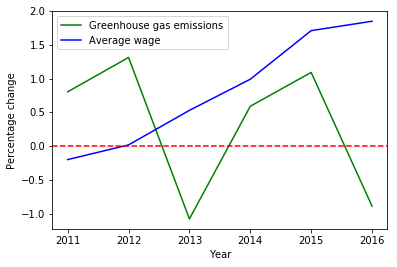

interactive(children=(Dropdown(description='x', options=('Australia', 'Austria', 'Belgium', 'Canada', 'Switzer…

<function __main__.get_con(x='Australia')>

In [15]:
#This is the main file, here we do most things
#Always use git change before writing anything!

#to upload changes: 
#1) git commit 
#2) git sync

#importing packeges
import pip 
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

#importing our other sheets
#Here we will clean all the data


#Here we import the CO2 database from OECD
df = pdr.DataReader("AIR_GHG","oecd")

#the data is in "multi-index form", these codes turns it into a more common non-hieracical structure
df.reset_index()
dir(df.index)
df.columns = [' '.join(col).strip() for col in df.columns.values]

#The countries are not "availeble to grap" so i have manually made a list using excel
countries = ["Australia","Austria","Belgium","Canada","Chile","Czech Republic","Denmark","Estonia","Finland","France","Germany","Greece","Hungary","Iceland",	
    "Ireland","Israel","Italy","Japan","Korea","Latvia","Lithuania","Luxembourg","Mexico","Netherlands","New Zealand","Norway","Poland","Portugal","Slovak Republic",
    "Slovenia","Spain","Sweden","Switzerland","United Kingdom","United States"]	
countrycode = ["AUS", "AUT", "BEL", "CAN", "CHL", "CZE", "DNK", "EST", "FIN", "FRA", "DEU","GRC", "HUN", "ISL", "IRL", "ISR", "ITA", "JPN", 
    "KOR", "LVA", "LTU", "LUX", "MEX", "NLD", "NZL", "NOR", "POL", "PRT", "SVK", "SVN", "SWE", "ESP", "CHE", "GBR", "USA"]
ccc = dict(zip(countries,countrycode))
# I initiate an empty list for the dataset and set the counter to 0
x = []
i = 0
for c in countries:
    for y in df.index.values : 
        x.append({"country" : c, "countrycode" : ccc[c],"emissions_GHG" : df[c+" "+"Greenhouse gases Total  emissions excluding LULUCF"][i]})
        i = i + 1 
        if i > 6 :
            i = 0

#In the for-loop i make a row for each country for each year, and insert a country, a year and the corrosponding of emissions of GHG (Green House Gases)
df_env = pd.DataFrame(x)
print(df_env)

#Here we import average income per capita data
data_wages= pd.read_csv("oecdwages.csv")
#drop column that we do not need
drop_these= ["INDICATOR","FREQUENCY","MEASURE","SUBJECT", "Flag Codes"]
copy = data_wages.drop(drop_these, axis=1, inplace=False)
copy.rename(columns = {'LOCATION':'countrycode', 'Value' : 'average wage', 'TIME' : 'year'}, inplace=True)
c = copy["countrycode"].unique()


#here i reset the index of the two variables, and sort by the common variable (countrycode). Then i merge by index position 
left = copy.sort_values("countrycode")
left = left.reset_index()
rigth = df_env.sort_values("countrycode")
rigth = rigth.reset_index()
data_all = left.merge(rigth,left_index=True,right_index=True)

#this for loop test if all the values of the countrycodes are the same in the same row
for i in data_all.index.values : 
    if data_all["countrycode_x"][i]==data_all["countrycode_y"][i] :
        if i == data_all.index.values[-1] : 
            print("Done")
    else :  
        print("mistake in "+data_all["country"][i])

#I then drop a few columns that are not needed
drops = ["index_x","index_y","countrycode_y"]
data_all.drop(drops,axis=1,inplace=True)
data_all.rename(columns ={"countrycode_x":"countrycode"},inplace=True)
#data_all.set_index("year",inplace=True)

#I make sure that the dataset is sortet and that the index is year
data_all = data_all.sort_values(by=["countrycode","year"])
data_all = data_all.reset_index(drop=True)
data_all.set_index("year",inplace=True)


#i make to lagged variables and take the log of them (this is almost like use percentage change in GHG and average wage)
data_all['d_GHG'] = data_all.groupby('countrycode')['emissions_GHG'].apply(lambda x: x.pct_change())*100
data_all['d_aw'] = data_all.groupby('countrycode')['average wage'].apply(lambda x: x.pct_change())*100

GHG_change = data_all.groupby("year").d_GHG.mean()

AW_change = data_all.groupby("year").d_aw.mean()



def information(a,b = 0,variable = True) :
    """ This function take three arguments, the country code, the year (optional the variable) and return the name of the country the average wage and the total emissions of GHG.
    The country code is the first column in our data base, three letters which represent the country. If the year is not define it will return for all years. If the variable is define
    it will return only this variable"""
    x = data_all[data_all["countrycode"] == a]
#define year and co2
    if b != 0 and variable == 'co2':
        d= x[data_all["year"] == b]
        f = d.loc[:, ["year", "country", "emissions_GHG"]]
        return f
#define year and wage
    elif b != 0 and variable == 'wage':
        d= x[data_all["year"] == b]
        g = d.loc[:, ["year", "country", "average wage"]]
        return g
 #define only co2
    elif b == 0 and variable == 'co2':
        d= x[data_all["year"] == b]
        return x.loc[:, ["year", "country", "emissions_GHG"]]
#define only wage
    elif b == 0 and variable == 'wage':
        g = x.loc[:, ["year", "country", "average wage"]]
        return x.loc[:, ["year", "country", "average wage"]]
#define only the year
    elif b != 0 : 
        h = x[data_all["year"] == b]
        return h.loc[:, ["year", "country", "average wage", "emissions_GHG"]]
#nothing define
    else :
        return x.loc[:, ["year", "country", "average wage", "emissions_GHG"]]


def translate(code = True, country = True) :
    """This function take one argument. By default it is the code of the country and return the name of the country. There is the possibility to precise if 
    the input is a code or country. It it's a country it will return the code."""
    i = 0
    if country == True :
        for c in countrycode :
            if code != countrycode[i] and i < 34 :
                i = i + 1
            elif code == countrycode[i] :
                return countries[i]
            else :
                return "miss spelling of the code"
    else :
        for c in countries :
            if country != countries[i] and i < 34 :
                i = i + 1
            elif country == countries[i] :
                return countrycode[i]
            else :
                return "miss spelling of the country"

translate('USA')
#fooling around with some plots

plt.plot(GHG_change,color="g")
plt.plot(AW_change,color="b")
plt.xlabel("Year")
plt.ylabel("Percentage change")
plt.legend(["Greenhouse gas emissions","Average wage"])
plt.axhline(y=0,color="r",linestyle="dashed")
plt.show()



#I would like to use the information function, but this requeres that the translate function works for country -> countrycode which it does not now
def get_con(x="Australia"):
    print("Country: "+x)
    print("Mean of Greenhouse gas emissions:" , round(data_all[data_all["country"]==x]["emissions_GHG"].mean(),2))
    print("Mean of average wages:" , round(data_all[data_all["country"]==x]["average wage"].mean(),2))

    plt.plot(data_all[data_all["country"]==x]["d_GHG"],color="g")
    plt.plot(data_all[data_all["country"]==x]["d_aw"],color="b")
    plt.xlabel("Year")
    plt.ylabel("Percentage change")
    plt.legend(["Greenhouse gas emissions","Average wage"])
    plt.axhline(y=0,color="r",linestyle="dashed")
    plt.show()

    return 

widgets.interact(get_con,x=data_all["country"].unique())






In [16]:
def get_con(x="Australia"):
    print("Country: "+x)
    print("Mean of Greenhouse gas emissions:" , round(data_all[data_all["country"]==x]["emissions_GHG"].mean(),2))
    print("Mean of average wages:" , round(data_all[data_all["country"]==x]["average wage"].mean(),2))

    plt.plot(data_all[data_all["country"]==x]["d_GHG"],color="g")
    plt.plot(data_all[data_all["country"]==x]["d_aw"],color="b")
    plt.xlabel("Year")
    plt.ylabel("Percentage change")
    plt.legend(["Greenhouse gas emissions","Average wage"])
    plt.axhline(y=0,color="r",linestyle="dashed")
    plt.show()

    return 

widgets.interact(get_con,x=data_all["country"].unique())





interactive(children=(Dropdown(description='x', options=('Australia', 'Austria', 'Belgium', 'Canada', 'Switzer…

<function __main__.get_con(x='Australia')>